In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

In [4]:
from types import SimpleNamespace

paths = SimpleNamespace(
    summary="results/rnnprop_{}/summary.csv",
    config="results/rnnprop_{}/config.json",
    evaluation="results/rnnprop_{}/period_19.npz",
    baseline="results/adam.json")

In [ ]:
full_names = {
    "base": "Imitation Learning, 1 Teacher",
    "metaonly": "No Imitation Learning",
    ""
}

In [47]:
def moving_average(a, n=10):
    """Moving average utility with truncated averages for the tails.
    
    Parameters
    ----------
    a : np.array
        Array input. Should be one dimensional.
    n : int
        Moving average window.
    """
    # Center
    cs = np.cumsum(a, dtype=float)
    cs[n:] = cs[n:] - cs[:-n]
    center = cs[n - 1:] / n

    # Tails
    left = np.cumsum(a[:int(n / 2)]) / np.arange(1, 1 + int(n / 2))
    right = np.flip(
        np.cumsum(a[-int(n / 2):][::-1]) / np.arange(1, 1 + int(n / 2)))
    return np.concatenate([left, center, right])


def plot_band(ax, x, y, label=None, color=None):
    """Plot mean and min-to-max color band for stacked data y."""
    lower, upper, mean = [f(y, axis=0) for f in [np.min, np.max, np.mean]]
    mean_line, = ax.plot(x, mean, label=label)
    ax.fill_between(x, lower, upper, alpha=0.5, color=mean_line.get_color())

(0.9, 1)

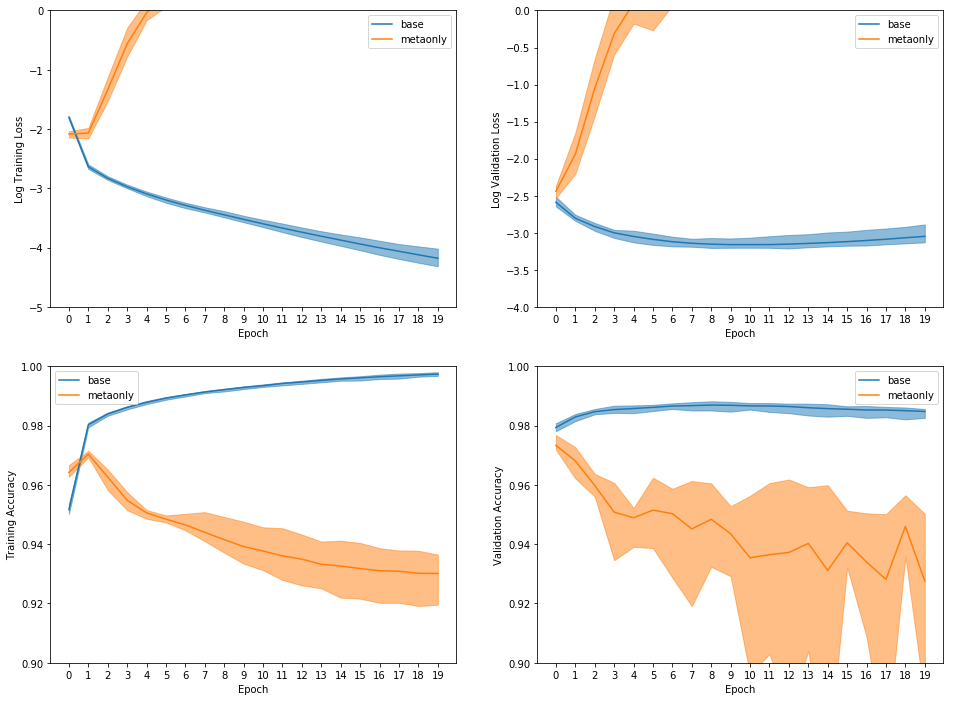

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for key in ["base", "metaonly"]:
    x = np.load(paths.evaluation.format(key))
    for ax, val in zip()
    plot_band(axs[0][0], np.arange(20), np.log(x["loss"]), label=full_names[key])
    plot_band(axs[0][1], np.arange(20), np.log(x["val_loss"]), label=key)
    plot_band(axs[1][0], np.arange(20), x["sparse_categorical_accuracy"], label=key)
    plot_band(axs[1][1], np.arange(20), x["val_sparse_categorical_accuracy"], label=key)

for ax in [*axs[0], *axs[1]]:
    ax.set_xticks(np.arange(20))
    ax.set_xlabel("Epoch")
    ax.legend()

axs[0][0].set_ylabel("Log Training Loss")
axs[0][1].set_ylabel("Log Validation Loss")
axs[1][0].set_ylabel("Training Accuracy")
axs[1][1].set_ylabel("Validation Accuracy")

axs[0][0].set_ylim(-5, 0)
axs[0][1].set_ylim(-4, 0)
axs[1][0].set_ylim(0.9, 1)
axs[1][1].set_ylim(0.9, 1)


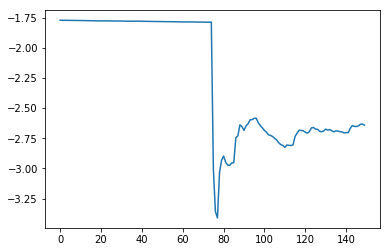

In [30]:
bl[0]
plt.plot(bl[0])